<a href="https://colab.research.google.com/github/prathikshaghasari/traveltide-customer-reward-segmentation/blob/main/traveltide_cohort_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TravelTide Cohort Feature Engineering**

##**Uploading file**

In [23]:
from google.colab import files
uploaded = files.upload()


Saving traveltide_selected_cohort.csv to traveltide_selected_cohort (1).csv


## **Necessary Imports**

In [2]:
!pip install pandasql
import pandas as pd

# Load CSV
session_cohort = pd.read_csv('traveltide_selected_cohort.csv')

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26773 sha256=bedddbf271307cfdddf0abc5fc61a4f3d6f6b175c990289f236f67b452648d45
  Stored in directory: /root/.cache/pip/wheels/68/5d/a5/edc271b998f909801d7956959f699b976cc9896075dc47c153
Successfully built pandasql


In [3]:
session_cohort.shape

(5998, 19)

In [4]:
session_cohort.head()

,user_id,gender,age,age_group,married,has_children,home_country,home_city,home_airport,total_sessions,total_page_clicks,num_trips,departure_flights,trip_type,first_trip_date,last_trip_date,avg_hotel_cost,total_hotel_cost,perk
0,23557,F,66,Senior,True,False,usa,new york,LGA,8,82,2,0,Solo or group trip,2023-01-04 00:00:00,2023-01-04 00:00:00,1835.25,3670.5,10% off group travel
1,94883,F,53,Middle-aged,True,False,usa,kansas city,MCI,8,73,2,4,Solo or group trip,2023-03-27 07:00:00,2023-04-16 10:00:00,65.00,130.0,10% off group travel
2,101486,F,52,Middle-aged,True,True,usa,tacoma,TCM,8,131,2,2,Parent trip,2023-06-10 10:00:00,2023-06-10 10:00:00,1099.50,2199.0,family discount
3,101961,F,44,Adult,True,False,usa,boston,BOS,8,126,5,10,Couple trip,2023-02-08 07:00:00,2023-06-27 11:00:00,485.80,2429.0,romantic getaway voucher
4,106907,F,46,Middle-aged,True,True,usa,miami,TNT,8,240,0,0,No trips,2023-01-04 00:00:00,2023-01-04 00:00:00,0.00,0.0,30% off first travel


In [5]:
session_cohort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5998 entries, 0 to 5997
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            5998 non-null   int64  
 1   gender             5998 non-null   object 
 2   age                5998 non-null   int64  
 3   age_group          5998 non-null   object 
 4   married            5998 non-null   bool   
 5   has_children       5998 non-null   bool   
 6   home_country       5998 non-null   object 
 7   home_city          5998 non-null   object 
 8   home_airport       5998 non-null   object 
 9   total_sessions     5998 non-null   int64  
 10  total_page_clicks  5998 non-null   int64  
 11  num_trips          5998 non-null   int64  
 12  departure_flights  5998 non-null   int64  
 13  trip_type          5998 non-null   object 
 14  first_trip_date    5998 non-null   object 
 15  last_trip_date     5998 non-null   object 
 16  avg_hotel_cost     5998 

In [6]:
session_cohort.describe()

,user_id,age,total_sessions,total_page_clicks,num_trips,departure_flights,avg_hotel_cost,total_hotel_cost
count,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000
mean,545440.695565,42.815105,8.204568,144.308436,2.582361,4.291097,710.571978,1757.946315
std,64924.749760,12.044357,0.460911,72.330165,1.533290,2.986260,908.727783,2070.992742
min,23557.000000,18.000000,8.000000,33.000000,0.000000,0.000000,0.000000,0.000000
25%,517152.000000,36.000000,8.000000,102.000000,1.000000,2.000000,225.000000,411.000000
50%,540542.000000,43.000000,8.000000,127.000000,3.000000,4.000000,472.875000,1146.100000
75%,574146.000000,50.000000,8.000000,161.000000,4.000000,6.000000,869.000000,2373.500000
max,844489.000000,90.000000,12.000000,873.000000,8.000000,16.000000,14057.000000,28114.000000


## **Key Columns**
User Profile: user_id, gender, age, age_group, married, has_children, home_country, home_city, home_airport

Engagement Metrics: total_sessions, total_page_clicks

Travel Metrics: num_trips, departure_flights, trip_type, first_trip_date, last_trip_date

Hotel Spending: avg_hotel_cost, total_hotel_cost, avg_hotel_cost.1, total_hotel_cost.1

Perk: Discount or offer applied

## **Cross check**

In [7]:
# Continue with EDA: Convert date columns
session_cohort['first_trip_date'] = pd.to_datetime(session_cohort['first_trip_date'])
session_cohort['last_trip_date'] = pd.to_datetime(session_cohort['last_trip_date'])

In [8]:
session_cohort.isnull().sum()

,0
user_id,0
gender,0
age,0
age_group,0
married,0
has_children,0
home_country,0
home_city,0
home_airport,0
total_sessions,0


In [9]:
session_cohort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5998 entries, 0 to 5997
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            5998 non-null   int64         
 1   gender             5998 non-null   object        
 2   age                5998 non-null   int64         
 3   age_group          5998 non-null   object        
 4   married            5998 non-null   bool          
 5   has_children       5998 non-null   bool          
 6   home_country       5998 non-null   object        
 7   home_city          5998 non-null   object        
 8   home_airport       5998 non-null   object        
 9   total_sessions     5998 non-null   int64         
 10  total_page_clicks  5998 non-null   int64         
 11  num_trips          5998 non-null   int64         
 12  departure_flights  5998 non-null   int64         
 13  trip_type          5998 non-null   object        
 14  first_tr

# **Uncovering Patterns in the Data: A Visual Exploration**

## **1. Age Distribution**

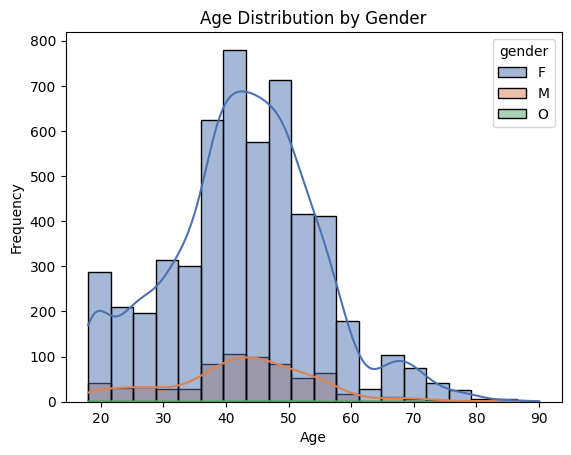

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.histplot(data=session_cohort, x='age', hue='gender', bins=20, kde=True, palette='deep')
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

## **2. Trip Type Frequency**

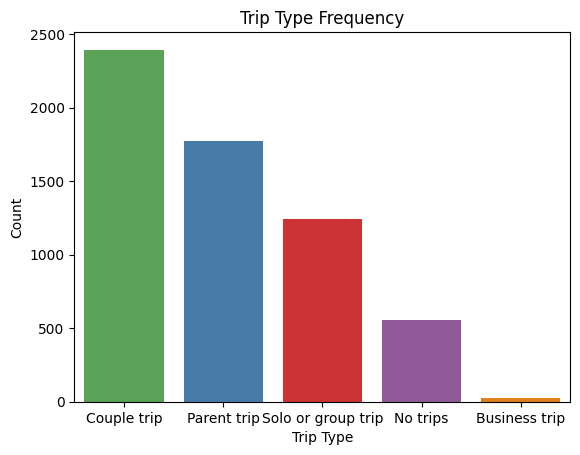

In [11]:
plt.figure()
order = session_cohort['trip_type'].value_counts().index  # Sort trip types by count
sns.countplot(data=session_cohort, x='trip_type', hue='trip_type', order=order, palette='Set1', legend=False)
plt.title('Trip Type Frequency')
plt.xlabel('Trip Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(False)
plt.show()


## **3. Average Hotel Cost Distribution**

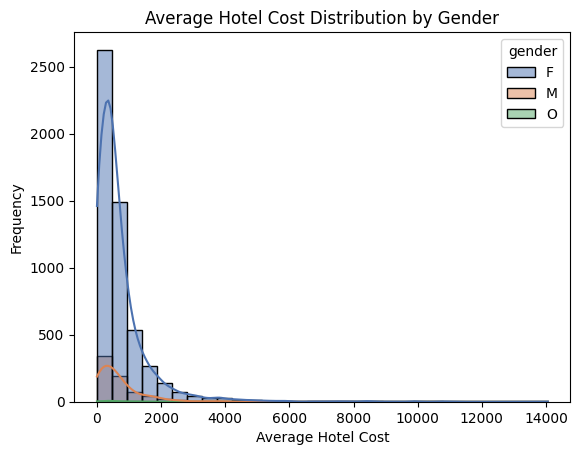

In [12]:
plt.figure()
sns.histplot(data=session_cohort, x='avg_hotel_cost', hue='gender', bins=30, kde=True, palette='deep')
plt.title('Average Hotel Cost Distribution by Gender')
plt.xlabel('Average Hotel Cost')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()


## **4. Perk Distribution**

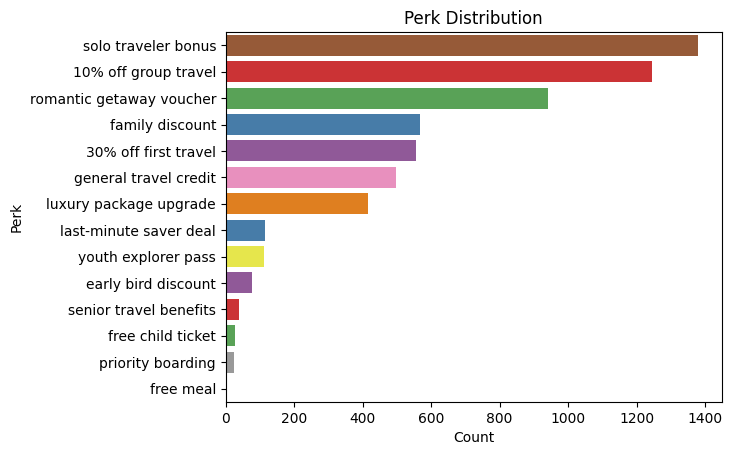

In [13]:
plt.figure()
sns.countplot(data=session_cohort, y='perk', hue='perk', palette='Set1',
              order=session_cohort['perk'].value_counts().index, legend=False)
plt.title('Perk Distribution')
plt.xlabel('Count')
plt.ylabel('Perk')
plt.grid(False)
plt.show()

## **5. Gender vs. Number of Trips**


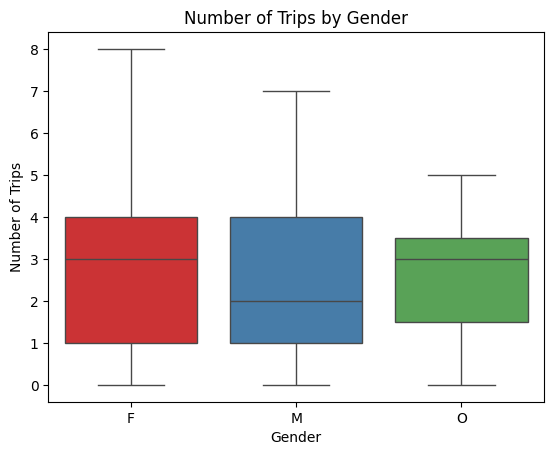

In [14]:
plt.figure()
sns.boxplot(data=session_cohort, x='gender', y='num_trips', hue='gender', palette='Set1', legend=False)
plt.title('Number of Trips by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Trips')
plt.grid(False)
plt.show()



# **Feature Engeneering**

## **1. Create binary flags for perk categories**


In [16]:
# These help identify which users received what type of perk.

session_cohort['has_solo_perk'] = session_cohort['perk'].str.contains('solo', case=False)
session_cohort['has_family_perk'] = session_cohort['perk'].str.contains('family', case=False)
session_cohort['has_couple_perk'] = session_cohort['perk'].str.contains('couple', case=False)

## **2. Engagement Metric: Clicks per Session**

In [17]:
# This measures how active a user is when they open the app/site.

session_cohort['clicks_per_session'] = session_cohort['total_page_clicks'] / session_cohort['total_sessions']

## **3. Spending Efficiency: Cost per Trip**

In [18]:
# Helps understand if a user spends more or less per trip.

session_cohort['cost_per_trip'] = session_cohort['total_hotel_cost'] / session_cohort['num_trips'].replace(0, 1)

## **4. Loyalty Label**

In [19]:
# Label power users (frequent or high spenders)
session_cohort['is_loyal'] = (
    (session_cohort['num_trips'] > 5) |
    (session_cohort['total_hotel_cost'] > 5000))

In [20]:
session_cohort[['user_id', 'has_solo_perk', 'clicks_per_session', 'cost_per_trip', 'is_loyal']].head(10)

,user_id,has_solo_perk,clicks_per_session,cost_per_trip,is_loyal
0,23557,False,10.250000,1835.250000,False
1,94883,False,9.125000,65.000000,False
2,101486,False,16.375000,1099.500000,False
3,101961,False,15.750000,485.800000,False
4,106907,False,30.000000,0.000000,False
5,118043,False,20.500000,1123.290000,True
6,120851,False,6.875000,2002.000000,False
7,125845,False,17.666667,229.666667,False
8,133058,False,9.125000,0.000000,False
9,149058,False,17.750000,1074.600000,True


## **Session Cohort With Features**

In [21]:
session_cohort.head(10)

,user_id,gender,age,age_group,married,has_children,home_country,home_city,home_airport,total_sessions,...,last_trip_date,avg_hotel_cost,total_hotel_cost,perk,has_solo_perk,has_family_perk,has_couple_perk,clicks_per_session,cost_per_trip,is_loyal
0,23557,F,66,Senior,True,False,usa,new york,LGA,8,...,2023-01-04 00:00:00,1835.250000,3670.50,10% off group travel,False,False,False,10.250000,1835.250000,False
1,94883,F,53,Middle-aged,True,False,usa,kansas city,MCI,8,...,2023-04-16 10:00:00,65.000000,130.00,10% off group travel,False,False,False,9.125000,65.000000,False
2,101486,F,52,Middle-aged,True,True,usa,tacoma,TCM,8,...,2023-06-10 10:00:00,1099.500000,2199.00,family discount,False,True,False,16.375000,1099.500000,False
3,101961,F,44,Adult,True,False,usa,boston,BOS,8,...,2023-06-27 11:00:00,485.800000,2429.00,romantic getaway voucher,False,False,False,15.750000,485.800000,False
4,106907,F,46,Middle-aged,True,True,usa,miami,TNT,8,...,2023-01-04 00:00:00,0.000000,0.00,30% off first travel,False,False,False,30.000000,0.000000,False
5,118043,F,53,Middle-aged,False,True,usa,los angeles,LAX,8,...,2023-07-01 14:00:00,1404.112500,5616.45,family discount,False,True,False,20.500000,1123.290000,True
6,120851,F,52,Middle-aged,True,True,usa,santa ana,SNA,8,...,2023-04-15 07:00:00,2002.000000,2002.00,luxury package upgrade,False,False,False,6.875000,2002.000000,False
7,125845,F,41,Adult,True,False,usa,el paso,BIF,9,...,2023-06-13 15:00:00,229.666667,689.00,10% off group travel,False,False,False,17.666667,229.666667,False
8,133058,F,20,Young Adult,False,False,usa,austin,AUS,8,...,2023-04-02 14:00:00,0.000000,0.00,youth explorer pass,False,False,False,9.125000,0.000000,False
9,149058,F,52,Middle-aged,False,True,usa,birmingham,BHM,8,...,2023-04-20 09:00:00,1074.600000,5373.00,family discount,False,True,False,17.750000,1074.600000,True


In [22]:
# Saving engineered cohort dataset to a CSV
session_cohort.to_csv('session_cohort_engineered.csv', index=False)


In [ ]:
from google.colab import files
files.download("session_cohort_engineered.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>